<style>
h1 {
  color: #0078d4
}
</style>
<h1>Clustering algorithms</h1>

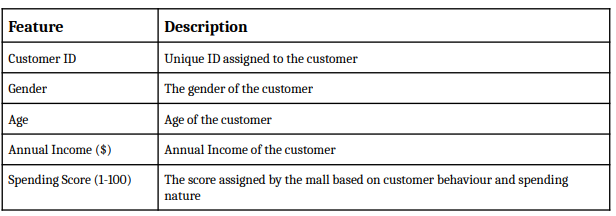

Questions:
1. Load the dataset and perform exploratory data analysis (EDA).
2. Preprocess the data by calculating the number of rows and columns, number of
missing values, outliers, distribution means, medians, quantiles, scaling,
transformation, visualisation, etc.
3. Apply four different clustering algorithms of your choice (e.g., K-means, Hierarchical,
DBSCAN, BIRCH, etc.).
4. Evaluate the performance of each clustering algorithm using relevant metrics (e.g.,
silhouette score, etc.)
5. Discuss the strengths and weaknesses of each clustering algorithm in the context of the
given dataset
6. Discuss your findings and propose potential applications or further steps based on
your results

In [2]:
import pandas as pd

In [7]:
#Importing the dataset
df = pd.read_csv("mall_customers_dataset.csv", sep=';', header=1)

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40
